## 1. Probability for ML

The probability plays a key role in moder machine learning application as it is all about modeling and making predictions. For instance;
* making predictions about the probability of a patient having certain eye related disease(glaucoma etc) in the next year, given person's medical history
* detecting anomalies and spams
* structuring reward and punishment mechanisms in reinforcement learning while an agent performs certain tasks
* in recommendation engines, we can predict the probability of a user who might buy a particular product ato recommend related products alongside with it. 

To be able to understand above mentioned use cases clearly, first we need to have a vivid understanding of ```probability and information theory ```.

While ***probability theory*** is a fundamental mathematical framework to represent uncertainty, ***information theory*** is a way to measure the amount uncertainty quantitatively. 

In [1]:
# Imports
import os
import random
import sys

import tensorflow as tf
import tensorflow_probability as tfp

# By convention, we generally refer to the tf probability distributions library as tfd.
tfd = tfp.distributions

import seaborn as sns

from matplotlib import pyplot as plt
from collections import defaultdict

In [3]:
from helpers import evaluate


# turning of tensorflow INFO, WARNING, and ERROR messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# plt axis colors setup
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red', 'text.color':'orange'})

color_b = 'dodgerblue'
color_o = '#FF9A13'
color_sb = '#0504aa'
color_do = 'darkorange'

Links for LATEX

https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/

https://en.wikibooks.org/wiki/LaTeX/Mathematics

### 1.1 Why to study probaility
In Machine Learning applications we deal with uncertain and stochastic (nondetemrnisitic) quantities. These uncertainties mainly come from many sources. Such as:

* ```Incomplete observability```: When making predictions about certain events in applications we mostly dont have all observations from the event happening. 
 
``` 
[TODO]
* add example
```

* ```Incomplete modeling```: While building machine learning models it is not always possible to include all information observed into model. As a result, the model has uncertainty in its predictions. 

``` 
[TODO]
* add example
```

Another scenario in which we need to apply probability is that in certains cases it is more useful to use a simple probabilistic rule rather than modeling a deterministic complex rule. 


``` 
[TODO]
* add example
```


### 1.2 Random Variable
We will be using random variables a lot throughout this notebook as they are descriptions of states that are possible. 

We will donate random variable with $\mathrm{x} = x$and it s possoible values $x_1, x_2,...,x_n$.

Random variable may have discrete or continous values. While discrete random variables have a finite or countably imfinite number of states, continuous random variables have real values. 


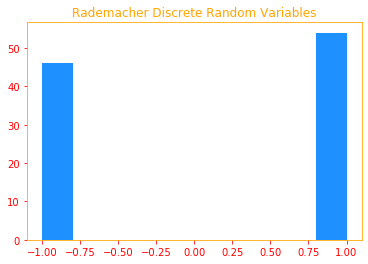

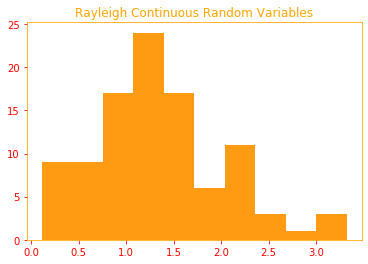

In [4]:
# Discrete random variable
rademacher = tfp.math.random_rademacher([1, 100], dtype=tf.int32)

# Continuous random variable
rayleigh = tfp.math.random_rayleigh([1, 100], dtype=tf.float32)

# Plot discrete random variable 1 and -1
plt.title("Rademacher Discrete Random Variables")
plt.hist(rademacher, color=color_b)
plt.show()

# Plot continuous random variable
plt.title("Rayleigh Continuous Random Variables")
plt.hist(rayleigh, color=color_o)
plt.show()

### 1.3 Probability Distributions
A probability distribution is a mathematical function that describes all the possible values and likelihoods that a random variable or a set of random variable can take. It is defined based on whether the variables are discrete or continous.



#### 1.3.1 Discrete Variables and Probability Mass Functions

$\forall x \in X, \quad \exists y \leq \epsilon$ 

We usually define a probability distirbution over  discrete variables by a ***probability mass function (PMF)*** and denoted by capital ***P***. 

PMF maps from a state of a random variable to the probability of that random variable taking on that state. In mathematical terms we define that as  follows: 
$\mathrm{x} = x$ is $P(x)$

While defining a ***joint probability*** over many variables at the same time, we use the notation as $P(\mathrm{x} = x,\mathrm{y} = y)$ and it denotes the probaility $\mathrm{x} = x$ and $\mathrm{y} = y$ simultaneously. It can be also written by only $P(x, y)$. 

There is certain conditions that $P$ must satisfy in order to be PMF on a random variable:
* $\forall x \in \mathrm{x}, 0 \leq P(x) \leq 1$. In other words, the probabilty must be between 0 and 1.
* $\sum_{x \in \mathrm{x}} P(x) = 1$. That is a ***normalization*** term in probability and it indicates an important property. That allows us not to obtain probabilities greater than 1. 



#### 1.3.2 Continuous Variables and Probability Density Functions

When we work with continuos variables we use ***probability density functions (PDF)*** instead of PMF. We denote pdf as $p$. 
PDF must satisfy following conditions:
* $\forall x \in \mathrm{x}, p(x) \geq 0$
* $\int p(x) dx = 1$

#### Sample 2: Continuos Uniform Distribution
We can define uniform distribution for continuos variable as a function of $u(x;a,b)$, where $a$ and $b$ are the end points of the interval with $b \gt a$. This whole notation equals to:
$$
u(x;a,b) = \frac{1}{b-a}
$$ 

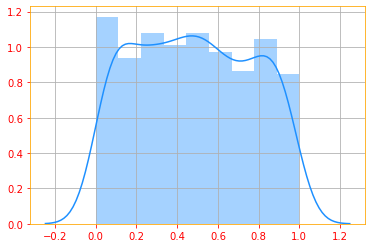

In [19]:

# Outputs random values from a uniform distribution
continuous = tf.random.uniform([1, 500], minval=0, maxval=1, dtype=tf.float32)    
g = sns.distplot(continuous, color=color_b)
plt.grid()

### 1.3 Marginal Probability

Marginalization is the operation of determining  $P(y)$  from  $P(x,y)$.

$$
P(y) = \sum_{x}P(x,y)
$$
 
This is also known as the **sum rule**. The probability or distribution as a result of marginalization is called a marginal probability or a marginal distribution. It is an answer of folloing question:
 * what is the probability of a subset of random variables from a superset of them

In [20]:
"""
Let's start by creating three distributions for Waymo, Uber and Tesla (W, U and T) and use Bernoulli distribution
since for Bernoulli distribution the outcome can only be 0 or 1, in our case, not hit and hit.

Say the probabilities of getting hit for W = 0.1, U = 0.2 and T = 0.3. 
With tfp.distributions, you don't have to create individual distributions line by line, you can specify the 
probabilities inside "probs" argument. This call defines three independent Bernoulli distributions, which happen 
to be contained in the same Python Distribution object (self_driving). 

The three events W, U and T are independent but we would like to specify a joint distribution to be able to 
calculate the marginal probability of the event [0, 0, 0], the probability of not getting hit by any three. 
For this we would be using a higher order distribution called Independent, which takes independent distributions 
and yields a new distribution. 
"""

# Bernoulli distributions for Waymo, Uber and Tesla 
self_driving = tfd.Bernoulli(probs=[.1, .2, .3])

# Individual probabilities of getting hit by W, U and T and these should match with the specified probs
print("Individual probabilities: {}".format(self_driving.prob([1, 1, 1])))

# Combining the distributions to create the independent distribution
self_driving_joint = tfd.Independent(self_driving, reinterpreted_batch_ndims=1)

# Finally let's calculate the marginal probability of [0, 0, 0]
print("Marginal Probability of event [0, 0, 0]: {:.4}".format(self_driving_joint.prob([0, 0, 0])))

Individual probabilities: [0.09999999 0.19999999 0.29999998]
Marginal Probability of event [0, 0, 0]: 0.504


### 1.4 Conditional Probability

In many machine learning problems,  conditional probability gives the probability of some event, given some other event occured. We denote that as $\mathrm{y} = y$ given $\mathrm{x} = x$ by $P(\mathrm{y} = y  
|  \mathrm{x} = x)$. This can be formulated as follow:

$$
P(\mathrm{y} = y  |  \mathrm{x} = x) = \frac{P(\mathrm{y} = y,\mathrm{x} = x)}{P(\mathrm{x} = x)}
$$

In [21]:
"""
Let's say I roll a fair die twice and obtain two numbers. 
X1 = result of the first roll and X2 = result of the second roll. 
Given that I know X1+X2 = 7, what is the probability that X1=4 or X2=4?

We start by doing 100 trials and we create a Multinomial distribution where total_count= number of trials,
probs = probability vectors for the events. We use Multinomial because it can have multiple outcomes and we 
take 2 samples from this distribution to resemble dice_1 and dice_2.
"""

for i in range(100):
    dice_roll_distribution = tfd.Multinomial(total_count=1., probs=[1/6.]*6)
    dice_sample = dice_roll_distribution.sample(2)

    # tf.where returns the index of the samples and we add 1 because indexing starts from 0
    dice_1 = tf.where(dice_sample[0])[0] + 1
    dice_2 = tf.where(dice_sample[1])[0] + 1

    if tf.equal((dice_1 + dice_2), 7):
        # There are two conditions (4, 3) and (3, 4) that would result in a sum of 7 with either x1=4 or x2=4
        prob_7 = (2/36.)

        # There are 6 combinations that would result in getting a 7 {(6,1),(5,2),(4,3),(3,4),(2,5),(1,6)}
        prob_4 = (6/36.)

        prob_4_given_7 = tf.divide(prob_7,prob_4)*100
        
        def f1(): return tf.print("X1: {} \t X2: {} \t P(X1 or X2=4 | 7): {:.4}%".format(dice_1, dice_2, 
                                                                                         prob_4_given_7), 
                                  output_stream=sys.stdout)
        def f2(): return None
        tf.cond(tf.logical_or(tf.equal(dice_1, 4), tf.equal(dice_2, 4)), f1, f2)
    else:
        continue


X1: [4] 	 X2: [3] 	 P(X1 or X2=4 | 7): 33.33%
X1: [3] 	 X2: [4] 	 P(X1 or X2=4 | 7): 33.33%
X1: [4] 	 X2: [3] 	 P(X1 or X2=4 | 7): 33.33%
X1: [3] 	 X2: [4] 	 P(X1 or X2=4 | 7): 33.33%
X1: [3] 	 X2: [4] 	 P(X1 or X2=4 | 7): 33.33%


### 1.5 Independence and Conditional Indepedence

It is also important to understand the difference between dependence and independence in probability. Two random variables  $\mathrm{x}$ and  $\mathrm{y}$ are independent means that the occurrence of one event of  $\mathrm{x}$  does not reveal any information about the occurrence of an event of  $\mathrm{y}$. 

In mathmetical terms:

$$
\color{green} {\forall x \in \mathrm{x}, \forall y \in \mathrm{y},P(\mathrm{x} = x,\mathrm{y} = y) =P(\mathrm{x} = x)P(\mathrm{y} = y) }
$$

Another usefull property of probability is conditional independece. That means two random variables $x$ and $y$ conditionally independet given a random variable $z$. It can be factorized as follows: 
$$
\forall x \in \mathrm{x}, \forall y \in \mathrm{y}, \forall z \in \mathrm{z},P(\mathrm{x} = x,\mathrm{y} = y |\mathrm{z} = z)   = P(\mathrm{x} = x |\mathrm{z} = z)P(\mathrm{y} = y |\mathrm{z} = z) 
$$

The compact notations of independence and conditional independence are given below:
* ```Independence```: $x \perp y$
* ```Conditional Independence```: $x \perp y | z$

### 1.6 Expectation, Variance and Covarince
**Expected value** of some function $f(x)$ w.r.t. a probability distribution $P( \mathrm{x})$ is the mean value that $f$ takes when $x$ is drawn from P.



$$
E_x = \sum_{x}P(x)f(x)$$


**Variance** is the measure of variability in the data from the mean value. In probability, it is the variability of $f$ from it's expected value drawn from it's probability distribution. 
$$
Var(f(x)) = E[(f(x) -E[f(x)])^2]
$$

If the variance is low, $f(x)$ approximates close to mean value. 

**Covariance** is the measure of linear relationship between values. 
$$
Cov(f(x),g(y)) = E[(f(x) -E[f(x)])(g(y) -E[g(y)])]
$$


Covariance matrix of a random variable $x \in \mathbb{R}^n $ is an $n \times n$ matrix and its diagonal elements give the variance.

Blue Plot Variance: 0.25 
Orange Plot Variance: 2.25


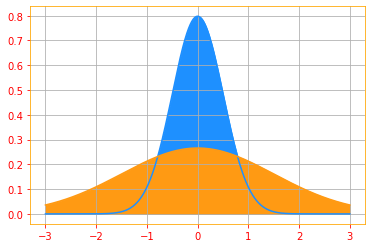

In [22]:
# creating an x axis from -3 to 3 with 0.001 increments
x_axis = tf.range(-3, 3, 0.001)

# Let's create two distributions to see how variance affects the distributions. loc(=mean) and std.deviation(=scale)
distribution_1 = tfd.Normal(loc=0., scale=0.5)
distribution_2 = tfd.Normal(loc=0., scale=1.5)

# Distribution plot 1
plt.plot(x_axis, distribution_1.prob(x_axis), color=color_b)
plt.fill_between(x_axis, distribution_1.prob(x_axis), color=color_b)

# Distribution plot 2
plt.plot(x_axis, distribution_2.prob(x_axis), color=color_o)
plt.fill_between(x_axis, distribution_2.prob(x_axis), color=color_o)
plt.grid()

print("Blue Plot Variance: {} \nOrange Plot Variance: {}".format(distribution_1.variance(), distribution_2.variance()))

### 1.7 Commonly used Probability Distributions

#### 1.7.1 Binomial distribution
A binomial random variable is the number of successes in n trials of a random experiment. A random variable x is said to follow binomial distribution when, the random variable can have only two outcomes(success and failure).Naturally , binomial distribution is for discrete random variables

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

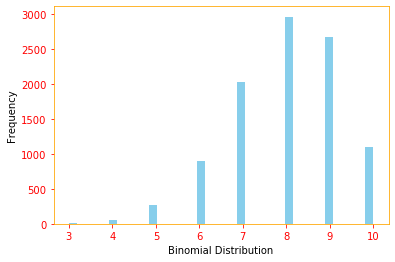

In [23]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

#### 1.7.2 Bernoulli Distribution
A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial, for example, a coin toss. So the random variable $x$ which has a Bernoulli distribution can take value 1 with the probability of success, $p$, and the value 0 with the probability of failure, $q$ or $1−p$. The probabilities of success and failure need not be equally likely. The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted $(n=1)$.

P(x = 1) = 0.5
P(x = 0) = 1 - 0.5 = 0.5
Property three is a generalization of property 1 and 2
For Bernoulli distribution The expected value of a Bernoulli random variable  X is p (E[X] = p)
Var(x) = 0.25 (1 - 0.25)


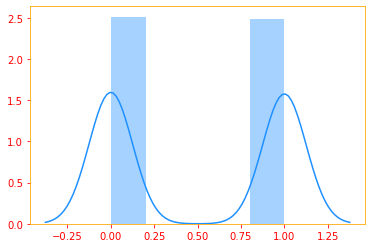

In [24]:
# Create a Bernoulli distribution with a probability .5 and sample size of 1000
bernoulli_distribution = tfd.Bernoulli(probs=.5)
bernoulli_trials = bernoulli_distribution.sample(1000)

# Plot Bernoulli Distribution
sns.distplot(bernoulli_trials, color=color_b)

# Properties of Bernoulli distribution
property_1 = bernoulli_distribution.prob(1)
print("P(x = 1) = {}".format(property_1))

property_2 = bernoulli_distribution.prob(0)
print("P(x = 0) = 1 - {} = {}".format(property_1, property_2))

print("Property three is a generalization of property 1 and 2")

print("For Bernoulli distribution The expected value of a Bernoulli random variable  X is p (E[X] = p)")

# Variance is calculated as Var = E[(X - E[X])**2]
property_5 = bernoulli_distribution.variance()
print("Var(x) = {0} (1 - {0})".format(property_5))

#### 1.7.3 Multinoulli Distribution


The __multinoulli__ or __categorical distribution__ is a distribution over a single discrete variable with *k* different states, where *k* is finite. The multinoulli distribution is a special case of the __multinomial distribution__, which is a generalization of Binomial distribution. A multinomial distribution is the distribution over vectors in ${0, \cdots, n}^k$ representing how many times each of the *k* categories visited when *n* samples are drawn from a multinoulli distribution.

Dice throw values: [[13.  8.  8. 10. 12.  9.]]
In sixty trials, index 0 represents the times the dice landed on 1 (= 13.0 times) and 
index 1 represents the times the dice landed on 2 (= 8.0 times)



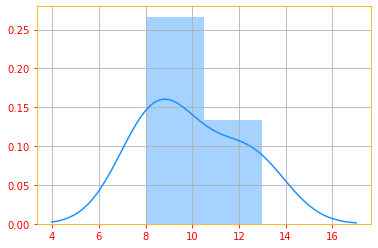

In [25]:
# For a fair dice
p = [1/6.]*6

# Multinoulli distribution with 60 trials and sampled once
multinoulli_distribution = tfd.Multinomial(total_count=60., probs=p)
multinoulli_pdf = multinoulli_distribution.sample(1)

print("""Dice throw values: {}
In sixty trials, index 0 represents the times the dice landed on 1 (= {} times) and 
index 1 represents the times the dice landed on 2 (= {} times)\n""".format(multinoulli_pdf, 
                                                                           multinoulli_pdf[0][0], 
                                                                           multinoulli_pdf[0][1]))

g = sns.distplot(multinoulli_pdf, color=color_b)
plt.grid()

#### 1.7.3 Gaussian Distribution

A normal distribution has a bell-shaped density curve described by its mean μ and standard deviation σ.  The probability distribution function of a normal density curve with mean μ and standard deviation σ at a given point x is given by:



The most commonly used distribution over real numbers is the __normal distribution__, also known as the __Gaussian distribution__:

$$\color{green}{\mathcal{N}(x; \mu, \sigma^2) = \sqrt{\frac{1}{2 \pi \sigma^2}} exp \Big(- \frac{1}{2 \sigma^2} (x - \mu)^2 \Big) }$$

The two parameters $\mu \in \mathbb{R}$ and $\sigma \in (0, \infty)$ control the normal distribution. The parameter $\mu$ gives the coordinate of the central peak. This is also the mean of the distribution: $\mathbb{E}[\mathrm{x}] = \mu$. The standard deviation of the distribution is given by $\sigma$, and the variance by $\sigma^2$.

The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean.


In the absence of prior knowledge about what form a distribution over the real numbers should take, the normal distribution is a good choice because, it has high entropy and central limit theorem suggests that sum of several independent random variables is normally distributed.


The normal distribution generalizes to $\mathbb{R}^n$, in which case it is known as the __multivariate normal distribution__. It may be parameterized with a positive definite symmetric matrix $\Sigma$:

$$\color{green}{\mathcal{N}(x; \mu, \Sigma) = \sqrt{\frac{1}{(2 \pi)^n det(\Sigma)}} exp \Biggr(- \frac{1}{2} (x - \mu)^\top \Sigma^{(-1)} (x - \mu) \Biggr)}$$

The parameter $\mu$ still gives the mean of the distribution, though now it is vector valued. The parameter $\Sigma$ gives the covariance matrix of the distribution.

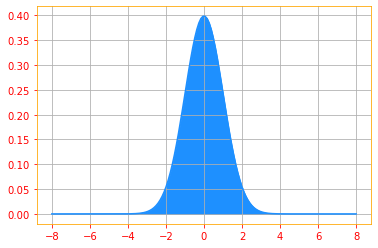

In [26]:
# We use linespace to create a range of values starting from -8 to 8 with incremants (= stop - start / num - 1)
rand_x= tf.linspace(start=-8., stop=8., num=150)

# Gaussian distribution with a standard deviation of 1 and mean 0
sigma = float(1.)
mu = float(0.)
gaussian_pdf = tfd.Normal(loc=mu, scale=sigma).prob(rand_x)

# convert tensors into numpy ndarrays for plotting
[rand_x_, gaussian_pdf_] = evaluate([rand_x, gaussian_pdf])

# Plot of the Gaussian distribution
plt.plot(rand_x_, gaussian_pdf_, color=color_b)
plt.fill_between(rand_x_, gaussian_pdf_, color=color_b)
plt.grid()

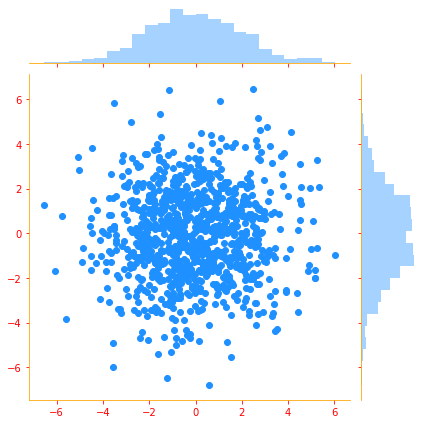

In [27]:
# multivariate normal distribution with two distributions with mean 0. and std.deviation of 2.
mvn = tfd.MultivariateNormalDiag(loc=[0., 0.], scale_diag = [2., 2.])

# take 1000 samples from the distribution
samples = mvn.sample(1000)

# Plot of multi variate distribution
g = sns.jointplot(samples[:, 0], samples[:, 1], kind='scatter', color=color_b)
plt.show()

### 1.8 Mixture of Distributions

One common way of combining simpler distributions to define probability distribution is to construct a __mixture distribution__. A mixture distribution is made up of several component distributions. On each trial, the choice of which component distribution should generate the sample is determined by sampling a component identity from a multinoulli distribution:

$$\color{orange}{P(\mathrm{x}) = \displaystyle\sum_i P(c = i) \ P(\mathrm{x} | c = i)}$$

where $P(c)$ is the multinoulli distribution over component identities.

The mixture model allows us to briefly glimpse a concept that will be of paramount importance later—the __latent variable__. A latent variable is a random variable that we cannot observe directly. Latent variables may be related to x through the joint distribution.

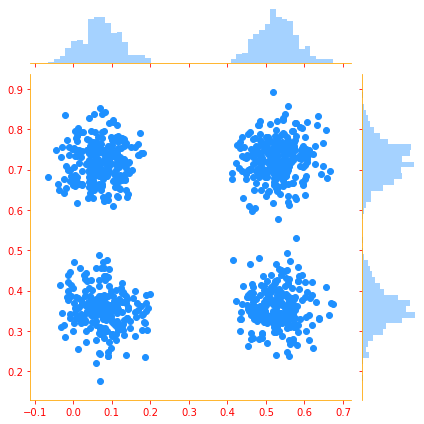

In [28]:
"""
We will be creating two variable with two components to plot the mixture of distributions.

The tfd.MixtureSameFamily distribution implements a batch of mixture distribution where all components are from 
different parameterizations of the same distribution type. In our example, we will be using tfd.Categorical to
manage the probability of selecting components. Followed by tfd.MultivariateNormalDiag as components. 
The MultivariateNormalDiag constructs Multivariate Normal distribution on R^k
"""

num_vars = 2        # Number of variables (`n` in formula).
var_dim = 1         # Dimensionality of each variable `x[i]`.
num_components = 2  # Number of components for each mixture (`K` in formula).
sigma = 5e-2        # Fixed standard deviation of each component.

# Set seed.
tf.random.set_seed(77)

# categorical distribution
categorical = tfd.Categorical(logits=tf.zeros([num_vars, num_components]))

# Choose some random (component) modes.
component_mean = tfd.Uniform().sample([num_vars, num_components, var_dim])

# component distribution for the mixture family
components = tfd.MultivariateNormalDiag(loc=component_mean, scale_diag=[sigma])

# create the mixture same family distribution
distribution_family = tfd.MixtureSameFamily(mixture_distribution=categorical, components_distribution=components)

# Combine the distributions
mixture_distribution = tfd.Independent(distribution_family, reinterpreted_batch_ndims=1)

# Extract a sample from the distribution
samples = mixture_distribution.sample(1000).numpy()

# Plot the distributions
g = sns.jointplot(x=samples[:, 0, 0], y=samples[:, 1, 0], kind="scatter", color=color_b, marginal_kws=dict(bins=50))
plt.show()

### 1.9  Bayes' Rule

__Bayes' rule__ is a useful tool that computes the conditional probability $P( x | y)$ from $P(y | x)$. Here 

- $P( x | y)$ is called the _posterior_; what we are trying to estimate, 
- $P(y | x)$ is called the _likelihood_; the probability of observing the new evidence, given our initial hypothesis, 
- $P(x)$ is called the _prior_; this is the probability of our hypothesis without any additional prior information,
- $P(y)$ is called the _marginal likelihood_; this is the total probability of observing the evidence.

The Bayes' rule can be summed up as:

$$\color{orange}{P(x | y) = \frac{P(x) \ P(y | x)}{P(y)} \tag{24}}$$

Even though $P(y)$ appears in the formula, it is usually feasible to compute $P(y) = \sum_x P(y | x) P(x)$, so we do not need to begin with knowledge of $P(y)$.

### 1.10  Information Theory

Information theory is a branch of applied mathematics that revolves around quantifying how much information is present in a signal. In the context of machine learning, we can also apply information theory to continuous variables where some of these message length interpretations do not apply. 

The basic intuition behind the information theory is that a likely event should have low information content, less likely events should have higher information content and independent events should have additive information.


To satisfy these properties, we define the __self-information__ of an event $\mathrm{x} = x$ to be:

$$\color{orange}{I(x) = -log \ P(x)}$$

Entropy of 10 coin tosses in nats: 0.6931471824645996 
For tosses: [0 1 0 0 0 1 1 0 0 1]


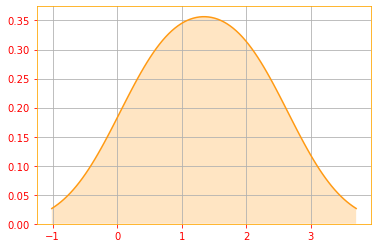

In [29]:
"""
No matter what combination of toss you get the Entropy remains the same but if you change the probability of the
trial, the entropy changes, play around with the probs and see how the entropy is changing and see if the increase
or decrease makes sense.
"""

coin_entropy = [2]                                                                     # creating the coin entropy list

for i in range(10, 11):
    coin = tfd.Bernoulli(probs=0.5)                                                    # Bernoulli distribution 
    coin_sample = coin.sample(i)                                                       # we take 1 sample
    coin_entropy.append(coin.entropy())                                                # append the coin entropy
    sns.distplot(coin_entropy, color=color_o, hist=False, kde_kws={"shade": True})     # Plot of the entropy

print("Entropy of 10 coin tosses in nats: {} \nFor tosses: {}".format(coin_entropy[1], coin_sample))
plt.grid()

Self information deals only with a single outcome. We can quantify the amount of uncertainty in an entire probability distribution using the __Shannon entropy__:

$$\color{orange}{H(\mathrm{x}) = \mathbb{E}_{x \sim P} [I(x)] = -\mathbb{E}_{x \sim P}[log \ P(x)] }$$

also denoted as $H(P)$.

Shannon entropy of a distribution is the expected amount of information in an event drawn from that distribution. It gives a lower bound on the number of bits needed on average to encode symbols drawn from a distribution P. Distributions that are nearly deterministic (where the outcome is nearly certain) have low entropy; distributions that are closer to uniform have high entropy. When $\mathrm{x}$ is continuous, the Shannon entropy is known as the __differential entropy__.

Entropy isn't remarkable for its interpretation, but for its  properties. For example, entropy doesn't care about the actual *x* values like variance, it only considers their probability. So if we increase the number of values *x* may take then the entropy will increase and the probabilities will be less concentrated.

If we have two separate probability distributions P(x) and Q(x) over the same random variable x, we can measure how different these two distributions are using the __Kullback-Leibler (KL) divergence__:

$$\color{orange}{D_{KL} (P \| Q) = \mathbb{E}_{x \sim P} \Big[ log \ \frac{P(x)}{Q(x)} \Big] = \mathbb{E}_{x \sim P} [log \ P(x) - log \ Q(x)] }$$

In the case of discrete variables, it is the extra amount of information needed to send a message containing symbols drawn from probability distribution P, when we use a code that was designed to minimize
the length of messages drawn from probability distribution Q.



The KL divergence has many useful properties, most notably being nonnegative. The KL divergence is 0 if and only if P and Q are the same distribution in the case of discrete variables, or equal “almost everywhere” in the case of continuous variables.

A quantity that is closely related to the KL divergence is the __cross-entropy__ $H(P, Q) = H(P) + D_{KL} (P \| Q)$, which is similar to the KL divergence but lacking the term on the left:

$$\color{orange}{H(P, Q) = - \mathbb{E}_{x \sim P} \ log \ Q(x) }$$

Minimizing the cross-entropy with respect to Q is equivalent to minimizing the KL divergence, because Q does not participate in the omitted term.

### Probabilistic Models
Explain in Graph Neural Nets and Bayesian Nets section